In [39]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score,recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [40]:
df = pd.read_csv('titanic-passengers.csv',encoding="ISO-8859-1",delimiter=';')
df.head(40)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
7,382,Yes,3,"Nakid, Miss. Maria (""""Mary"""")",female,1.0,0,2,2653,15.7417,NaN,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S


In [41]:
# converting the catecorical variables 
df.replace({ "Survived" : {"Yes" : 1 ,"No" : 0} },inplace=True)
df.replace({ "Sex" : {"female" : 1 ,"male" : 0} },inplace=True)

In [42]:
#extracting the feeatures that will be used
df_ = df[["Age","Sex","Survived"]]

#verify if there is any null variables
df_.isnull().sum()

Age         177
Sex           0
Survived      0
dtype: int64

In [43]:
# filling the missing information with their mean
df["Age"].fillna(df_.Age.mean(), inplace=True)

In [56]:
#define the target and the features
x = df[['Age','Sex']]
y = df['Survived']

In [57]:
#split the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

<AxesSubplot:xlabel='Age', ylabel='Survived'>

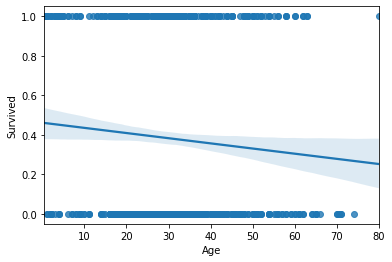

In [58]:
import seaborn as sns
sns.regplot(x='Age',y='Survived',data=df)

In [62]:
# define the logistic regression model
logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy = ",(logreg.score(x_test, y_test)))


Accuracy =  0.8251121076233184


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

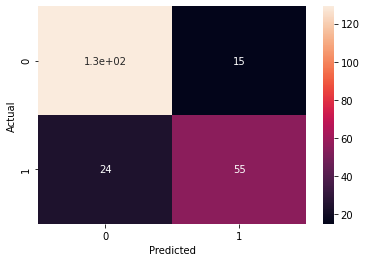

In [64]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

<li> True negative : 1300 </li>
<li> True positif : 55 </li>
<li> false negative : 24 </li>
<li> false positif : 15 </li>

In [50]:
print("Classification Report : \n" ,classification_report(y_test,y_pred))

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       144
           1       0.79      0.70      0.74        79

    accuracy                           0.83       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.82      0.83      0.82       223



# ROC / AUC
# ref : <a href="https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc?hl=fr"> reference </a>

ROC curve : receiver operating characteristic curve , is a graph showing the performance of a classification model at all classification thresholds. it plots : <br>

   <li> True Positive Rate<br></li>
    <li>False Positive Rate
    </li>


AUC : Area under the ROC Curve. It measures the two-dimensional area underneath the ROC curve

In [51]:
pred_prob = logreg.predict_proba(x_test)

In [52]:
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)

In [53]:
auc_score = roc_auc_score(y_test, pred_prob[:,1])

In [54]:
print("AUC" ,auc_score)

AUC 0.7602408579465542


This ROC curve has an AUC  = 0.76 , wich means it ranks a random positive example higher than a random negative example more than 76% of the time

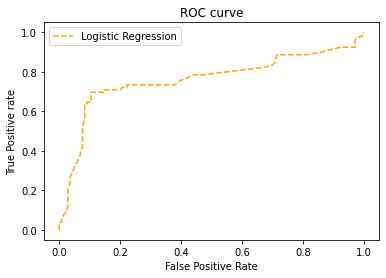

In [55]:

plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend()
plt.show()